In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [357]:
Crime_12_17 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', na_values = [None, 'NaN','Nothing'], header = 0)

In [358]:
Crime_Data = Crime_12_17[Crime_12_17.Year != 2017]


In [359]:
Crime_Data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [360]:
Crime_Data.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Updated On','Location',
                 'X Coordinate','Y Coordinate','Location'], inplace = True, axis = 1)

C:\Users\Vijayendra Jagtap\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [362]:
Crime_Data.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
0,10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,2016,41.864073,-87.706819
1,10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,2016,41.782922,-87.604363
2,10508697,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,2016,41.894908,-87.758372
3,10508698,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,2016,41.885687,-87.749516
4,10508699,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,2016,41.886297,-87.761751


In [363]:
Crime_Data.Date = pd.to_datetime(Crime_Data.Date, format = '%m/%d/%Y %I:%M:%S %p')
Crime_Data.index = pd.DatetimeIndex(Crime_Data.Date)

C:\Users\Vijayendra Jagtap\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


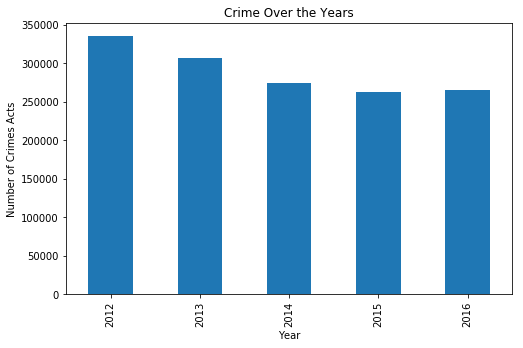

In [364]:
#make graph of crimes per year
plt.figure(figsize = (8,5))
Crime_Data.groupby([Crime_Data.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()



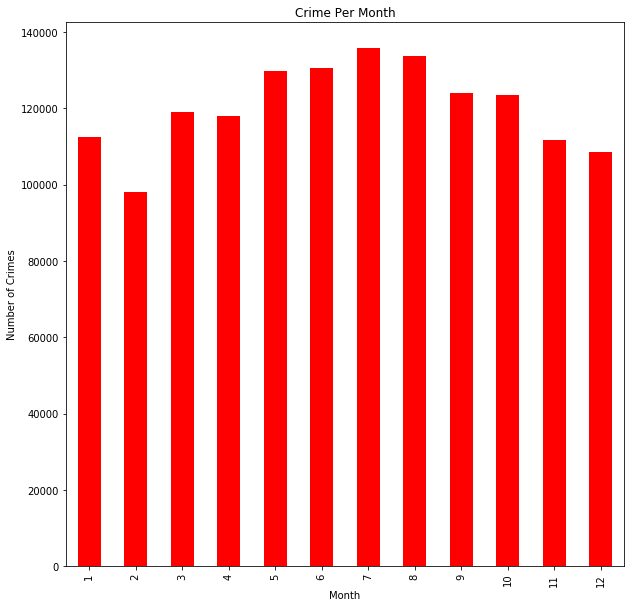

In [365]:
#make graph of crimes per month
Crime_Data.groupby([Crime_Data.index.month]).size().plot.bar(figsize = (10,10), color='r')
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

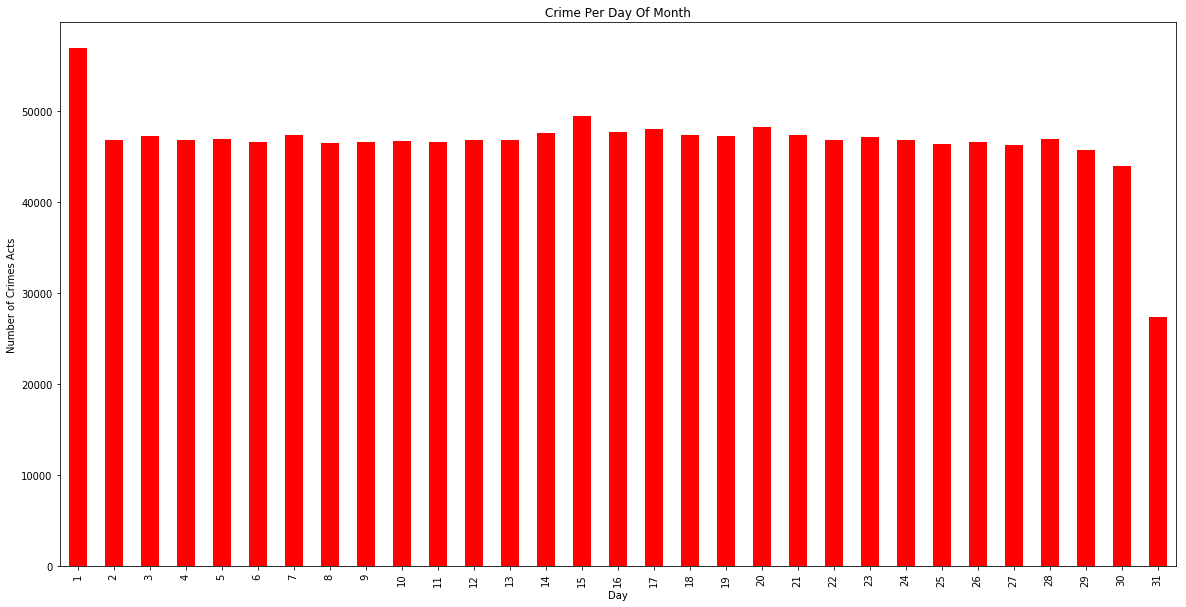

In [366]:
#graph of crimes per day
Crime_Data.groupby([Crime_Data.index.day]).size().plot.bar(figsize=(20,10), color='r')
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

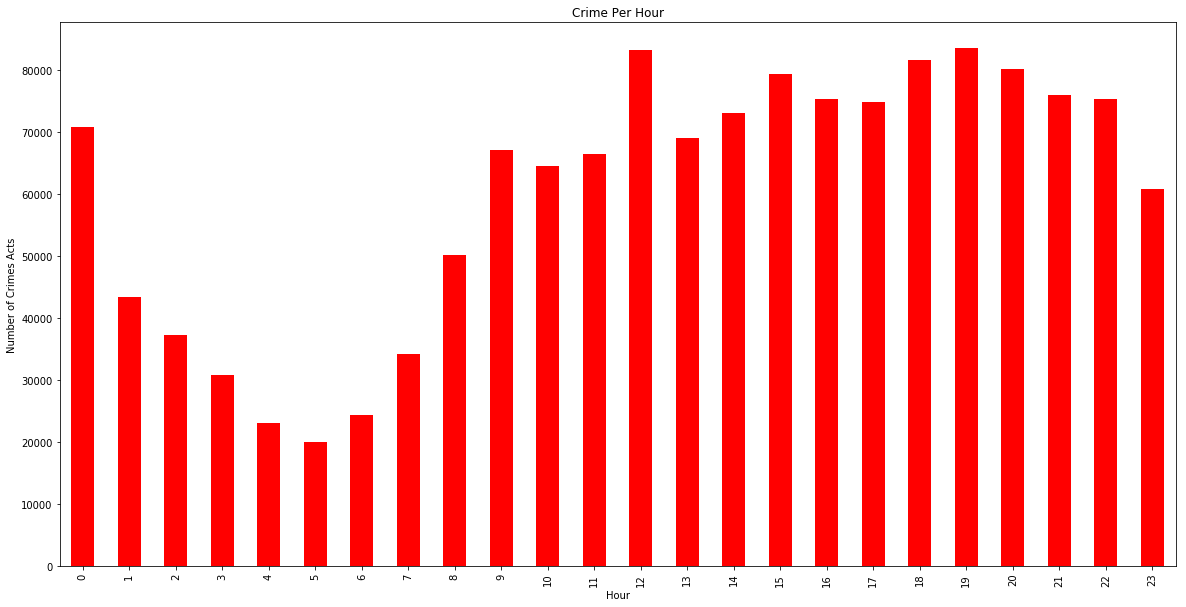

In [367]:
#graph of crimes per hour
Crime_Data.groupby([Crime_Data.index.hour]).size().plot.bar(figsize = (20,10), color = 'r')
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [368]:
Crime_Data_date = Crime_Data.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = Crime_Data.index.year, fill_value = 0)

In [369]:
Crime_Data_date.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2012,469,19898,59132,22844,0,1406,35853,8215,13426,724,...,6,17480,2203,17,3007,13484,1050,207,75454,3904
2013,364,17971,54003,17894,0,1264,30853,8135,13461,596,...,5,17984,1652,10,3135,11819,1013,153,71524,3246
2014,399,16896,49444,14569,15,1305,27797,7538,15300,393,...,10,16962,1625,10,2903,9798,949,140,61530,3114
2015,451,17040,48904,13183,34,1339,28669,6401,15365,310,...,5,17534,1322,14,2421,9639,943,154,57292,3362
2016,521,18710,50243,14240,36,1445,30978,6306,17291,189,...,4,17040,799,10,1602,11960,910,167,61167,3430


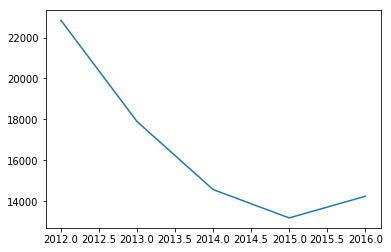

In [370]:
# get trend  of each type of Crime over the years
plt.plot(Crime_Data_date.index, Crime_Data_date['BURGLARY'])
plt.show()

In [383]:
list(Crime_Data_date)

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON - CRIMINAL',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION']

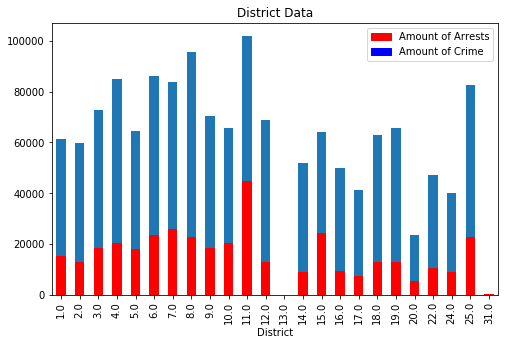

In [372]:
import matplotlib.patches as mpatches
red = mpatches.Patch(color='red', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')

Crime_Data_district = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['District'], 
                                         index = Crime_Data.index.date, fill_value = 0)
#crime per district
plt.figure(figsize = (8,5))
Crime_Data.groupby(Crime_Data['District']).size().plot(kind = 'bar')
Crime_Data_district.sum().plot(kind = 'bar', color = 'r')
plt.title('District Data')
plt.legend(handles=[red, blue])
plt.show()

Text(0.5, 1.0, 'Arrest Rates Per District')

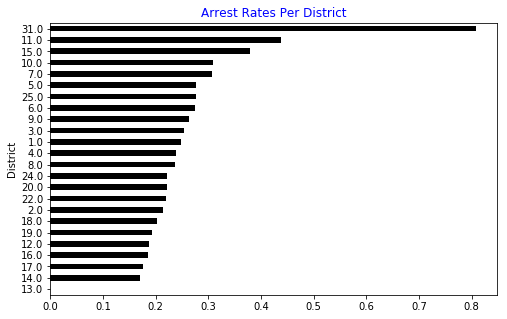

In [373]:
#Arrest rates per community area, ward, and district
A_R_D = Crime_Data_district.sum() / Crime_Data.groupby(Crime_Data['District']).size()
plt.figure(figsize = (8,5))
A_R_D.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per District', color = 'b')

In [374]:
Crime_Data.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
Date,,,,,,,,,,,,,,,
2016-05-03 23:40:00,10508693,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,2016,41.864073,-87.706819
2016-05-03 21:40:00,10508695,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,2016,41.782922,-87.604363
2016-05-03 23:31:00,10508697,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,2016,41.894908,-87.758372
2016-05-03 22:10:00,10508698,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,2016,41.885687,-87.749516
2016-05-03 22:00:00,10508699,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,2016,41.886297,-87.761751


In [375]:
Crime_Data_date = Crime_Data.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = Crime_Data['Year'], fill_value = 0)

In [376]:
Crime_Data_date.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,
2012,469,19898,59132,22844,0,1406,35853,8215,13426,724,...,6,17480,2203,17,3007,13484,1050,207,75454,3904
2013,364,17971,54003,17894,0,1264,30853,8135,13461,596,...,5,17984,1652,10,3135,11819,1013,153,71524,3246
2014,399,16896,49444,14569,15,1305,27797,7538,15300,393,...,10,16962,1625,10,2903,9798,949,140,61530,3114
2015,451,17040,48904,13183,34,1339,28669,6401,15365,310,...,5,17534,1322,14,2421,9639,943,154,57292,3362
2016,521,18710,50243,14240,36,1445,30978,6306,17291,189,...,4,17040,799,10,1602,11960,910,167,61167,3430


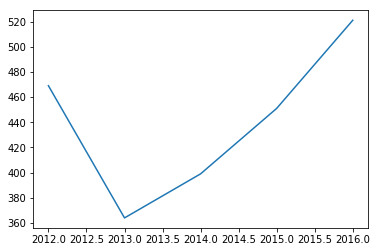

In [377]:
plt.plot(Crime_Data_date.index, Crime_Data_date['ARSON'])
plt.show()

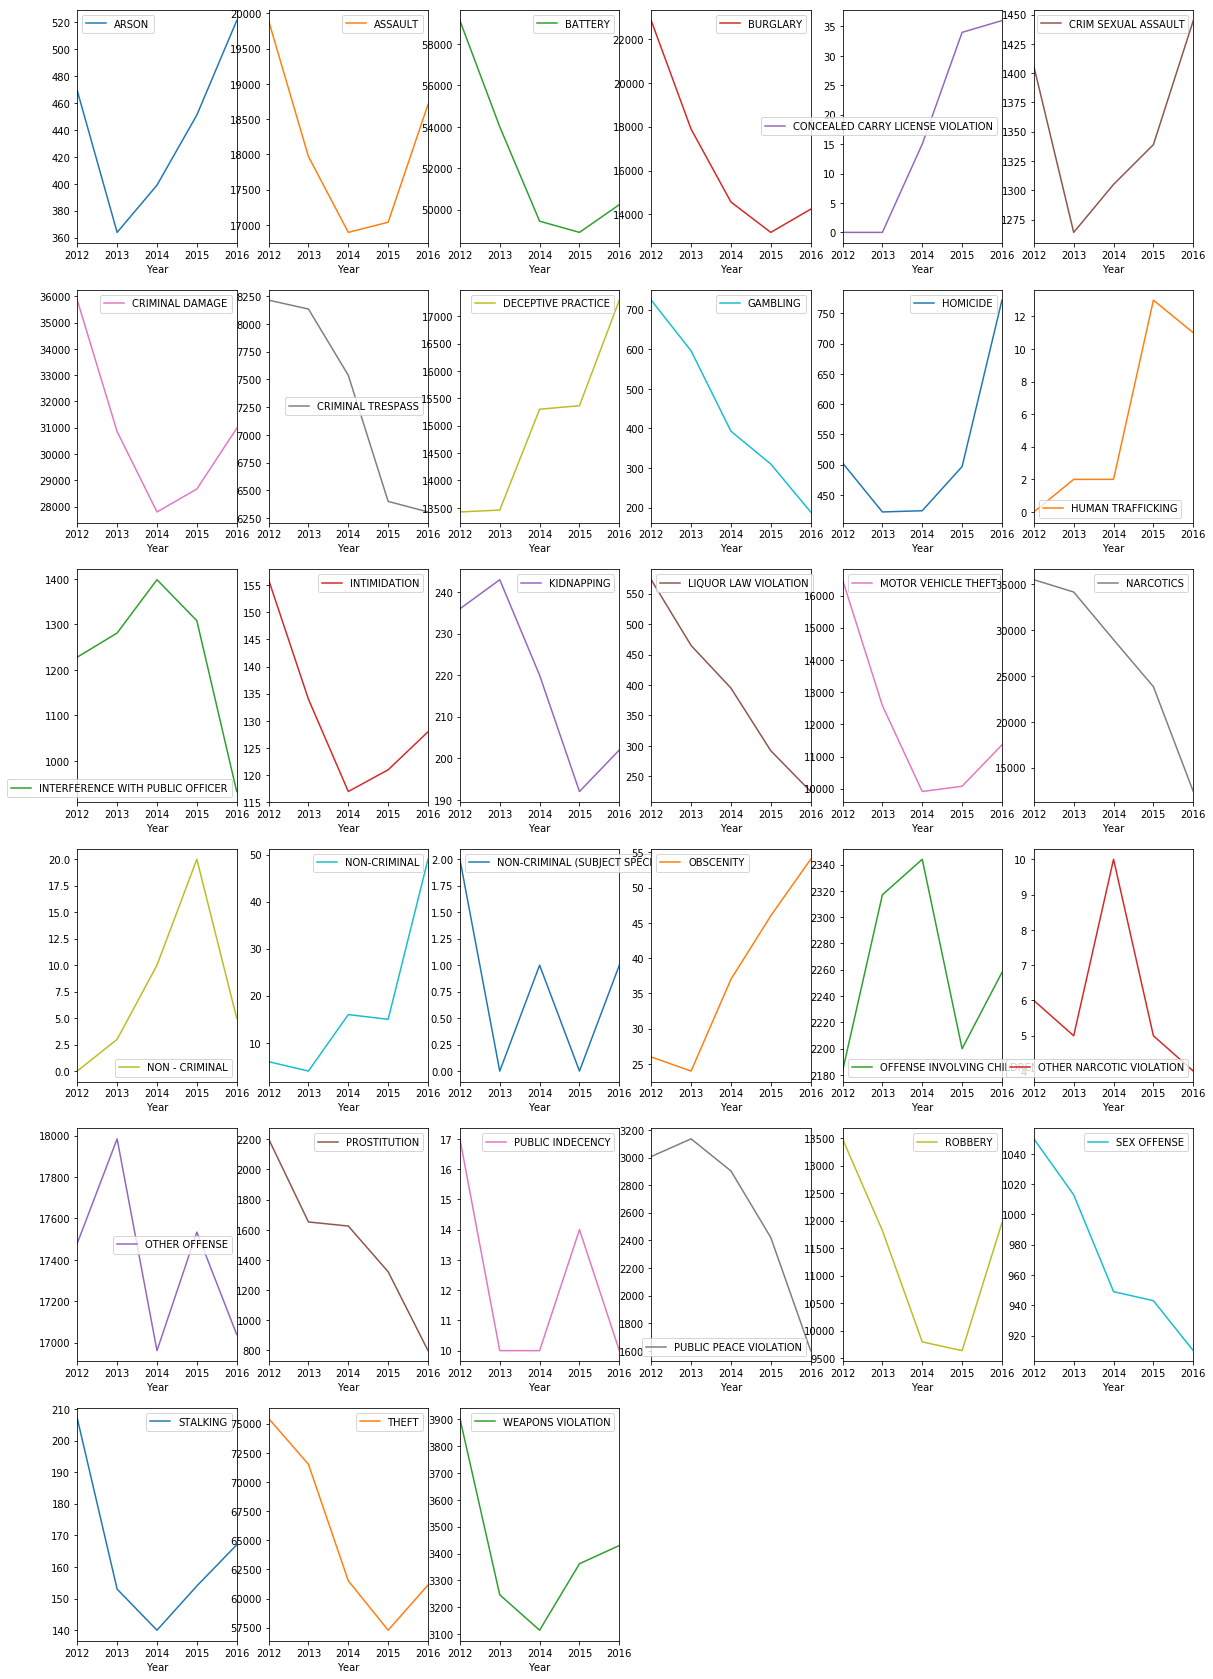

In [378]:
#make graph of different types of crimes per month
Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

[-1.01666714e+01  6.14532428e+04 -1.23819573e+08  8.31595784e+10]
-10.166671377975378


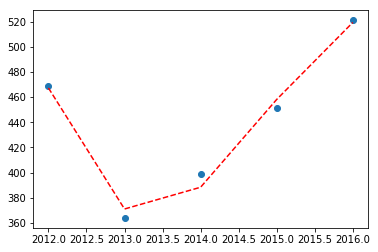

83035820253.6272


In [379]:
x = Crime_Data_date.index
y = Crime_Data_date['ARSON']

from scipy.interpolate import*

p1 = np.polyfit(x,y,3)
print(p1)
print(p1[0])

plt.plot(x,y, 'o')
xp = np.linspace(-2,6,100)
plt.plot(x, np.polyval(p1,x), 'r--')
plt.show()

year = 1

future = p1[0]+p1[1]*year+(p1[2]*year**2)+(p1[3]*year**3)

print(future)

[[59132]
 [54003]
 [49444]
 [48904]
 [50243]]


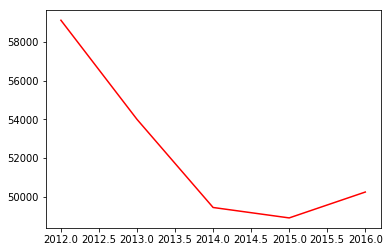

array([[38619.]])

In [349]:
# Thing that works!!!!!!!!!!!!!!!!!!!!!!!!!!!!

x = [[2012], [2013], [2014], [2015],[2016]]
y = Crime_Data_date.iloc[:,2:3].values
print(y)

plt.plot(x, y, color ='r')
plt.show()

time = pd.DataFrame(x)
crime = pd.DataFrame(y)

from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(time, crime)

time_new = [[2020]]
crime_predict = model.predict(time_new)
crime_predict

 

In [209]:
x = [[2012], [2013], [2014], [2015],[2016]]
y = Crime_Data_date.iloc[:,0:1].values


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

poly_reg = PolynomialFeatures(degree=3)
X_Poly = poly_reg.fit_transform(x, y)
linearreg_2 = LinearRegression()
model = linearreg_2.fit(X_Poly,y)

# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
    
plt.scatter(x,y,color ='red')
plt.plot(x, linearreg_2.predict(X_Poly), color ='blue')
plt.show()


[[469]
 [364]
 [399]
 [451]
 [521]]
[[ 0.00000000e+00 -1.24286088e+08  6.16847605e+04 -1.02049698e+01]]
[8.34729262e+10]


ValueError: shapes (3,2) and (4,1) not aligned: 2 (dim 1) != 4 (dim 0)

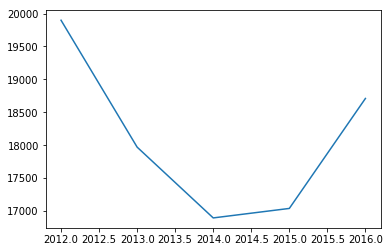

X=[2017], Predicted=[17110.9]


In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X = [2012], [2013], [2014], [2015],[2016]
y = Crime_Data_date.iloc[:,1:2].values
plt.plot(X,y)
plt.show()
# fit final model
model = LinearRegression()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
x = [[2017]]
# make a prediction
ynew = model.predict(x)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (x[0], ynew[0]))

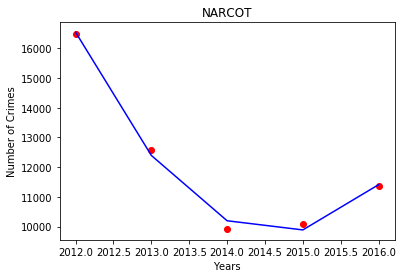

[[14704.57882309]]


In [394]:
X = [2012], [2013], [2014], [2015],[2016]
y = Crime_Data_date.iloc[:,16:17].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('NARCOT')
    plt.xlabel('Years')
    plt.ylabel('Number of Crimes')
    plt.show()
    return
viz_polymonial()

# Predicting a new result with Linear Regression
#print(lin_reg.predict([[2017]]))
#output should be 249500

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[2017]])))
#output should be 132148.43750003